In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
#cargamos los datos de entrada
dataframe = pd.read_csv(r"/home/dsc/Downloads/comprar_alquilar.csv")
dataframe.tail(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [5]:
dataframe.shape

(202, 10)

In [4]:
#normalizamos los datos
scaler = StandardScaler()

df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"

scaler.fit(df) # calculo la media para poder hacer la transformacion

X_scaled = scaler.transform(df)# Ahora si, escalo los datos y los normalizo

In [6]:
df.shape

(202, 9)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [7]:
type(X_scaled)

numpy.ndarray

In [13]:
import sys

pd.options.display.max_columns = None
np.set_printoptions(threshold=sys.maxsize)
X_scaled

array([[ 6.20128660e-01,  1.04688626e-01, -1.69895439e+00,
         5.04359485e-01,  6.49474936e-01,  1.95910205e-01,
        -1.22708822e+00,  5.62373603e-01, -9.84419825e-01],
       [ 1.06392660e+00, -1.01624569e-01, -7.12041907e-01,
        -5.15400836e-01,  2.59224169e-01,  1.93737026e+00,
        -2.96398122e-02,  1.29527339e+00,  5.96914606e-01],
       [ 8.91173039e-01,  2.26266045e-01, -9.12633876e-01,
         1.66724406e+00,  1.08030947e+00, -3.79102341e-01,
         1.16780860e+00, -1.70526189e-01,  1.38758182e+00],
       [ 1.27420938e+00,  1.12888627e+00, -1.57859921e+00,
        -1.55901520e+00,  9.09603628e-01,  2.11406196e+00,
        -1.22708822e+00, -9.03425981e-01, -5.89086217e-01],
       [ 7.19610883e-01, -4.00041869e-01,  9.03259677e-02,
         2.72786329e-02,  1.59467760e-01, -1.79497175e-01,
        -1.22708822e+00, -9.03425981e-01, -5.89086217e-01],
       [ 4.36652465e-01, -2.23201988e-01, -1.61069393e+00,
        -1.13560594e+00,  6.99988164e-01, -9.179087

In [14]:
#Instanciamos objeto PCA y aplicamos

pca = PCA(n_components=9) 
# Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)

shape of X_pca (202, 9)


In [15]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada


[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


In [18]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


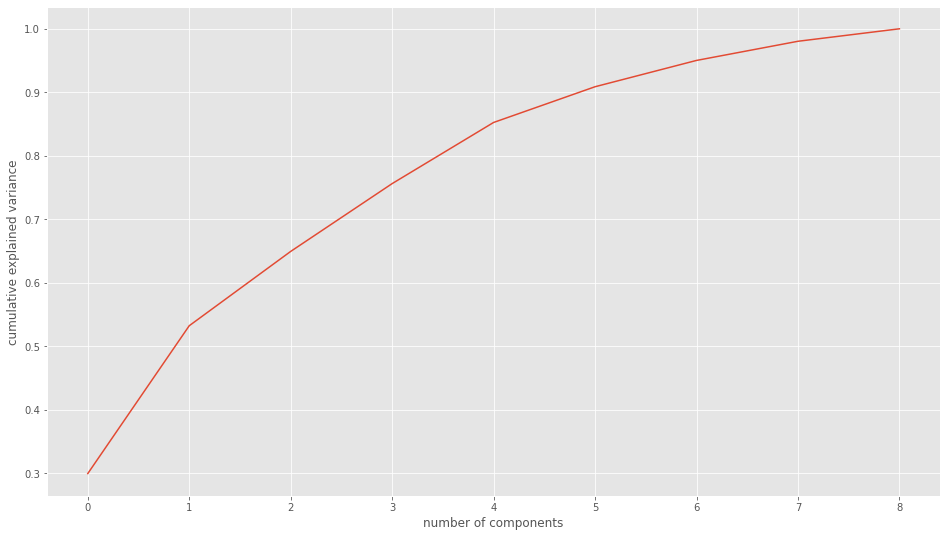

In [16]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

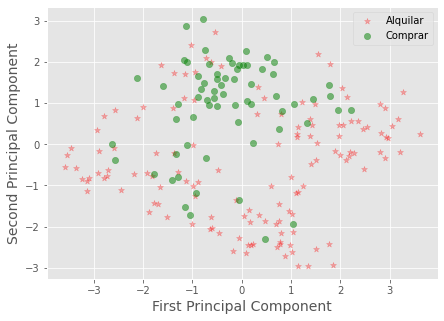

In [19]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax = X_pca[:,0]
Yax = X_pca[:,1]

labels = dataframe['comprar'].values

cdict = {0:'red',1:'green'}
labl = {0:'Alquilar',1:'Comprar'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig,ax = plt.subplots(figsize = (7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()